In [79]:
print("""
Business Analytics Model - Netflix Pricing Optimization

Objective: Build and evaluate a classification model to predict customer churn using the cleaned Streaming Service Customer Churn dataset, 
           prioritizing fast training.

Goal: Develop a model with acceptable predictive performance and short training time to inform Netflix's intelligent pricing optimization engine.

GitHub: https://github.com/Kmusinguzi/Netflix-Pricing-Nexford.git

ASSIGNMENT IMPLEMENTATION PLAN:
1. Data Review and Cleaning
2. Feature Preparation AND Exploratory Analysis
3. Model Building
4. Model Training and Implementation
5. Model Evaluation and Metrics
6. Model Visualizations
7. Business Insights and Recommendations
""")


Business Analytics Model - Netflix Pricing Optimization

Objective: Build and evaluate a classification model to predict customer churn using the cleaned Streaming Service Customer Churn dataset, 
           prioritizing fast training.

Goal: Develop a model with acceptable predictive performance and short training time to inform Netflix's intelligent pricing optimization engine.

GitHub: https://github.com/Kmusinguzi/Netflix-Pricing-Nexford.git

ASSIGNMENT IMPLEMENTATION PLAN:
1. Data Review and Cleaning
2. Feature Preparation AND Exploratory Analysis
3. Model Building
4. Model Training and Implementation
5. Model Evaluation and Metrics
6. Model Visualizations
7. Business Insights and Recommendations



In [80]:
# =============================================================================
# STEP 1: DATA REVIEW AND CLEANING
# =============================================================================
print("STEP 1: DATA REVIEW AND CLEANING")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from joblib import dump # To save the final model
import time
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set(style="whitegrid")

print("✅ Libraries imported successfully.")

# 2. Load Data
# Note: Using the exported path from the previous EDA script.
file_path = "C:/Users/Musinguzi/Documents/netflix_pricing_final.csv"
df = pd.read_csv(file_path)
print(f"✅ Data loaded successfully. Shape: {df.shape}")
print("\nData Info:")
# Remove this print(df.info()) as it can be lengthy in a final script output

# 3. Cleaning (Re-check on loaded data)
print("\n--- Data Cleaning Re-check ---")
# Drop the intermediate 'ValueSegment' column as it's a categorical feature engineered from a number, often better to use the number itself or target-encode it.
if 'Valuesegment' in df.columns:
    df.drop(['Valuesegment'], axis=1, inplace=True)
# Drop Customerid if it was not dropped during the initial cleaning phase
if 'Customerid' in df.columns:
    df.drop(['Customerid'], axis=1, inplace=True)

print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("✅ Cleaning complete. New shape:", df.shape)

STEP 1: DATA REVIEW AND CLEANING
✅ Libraries imported successfully.
✅ Data loaded successfully. Shape: (125000, 23)

Data Info:

--- Data Cleaning Re-check ---
Missing values per column:
 Age                            0
Location                    1333
Subscriptiontype            1333
Paymentplan                    0
Numsubscriptionpauses          0
Paymentmethod                  0
Customerserviceinquiries       0
Signupdate                     0
Weeklyhours                    0
Averagesessionlength           0
Songskiprate                   0
Weeklysongsplayed              0
Weeklyuniquesongs              0
Numfavoriteartists             0
Numplatformfriends             0
Numplaylistscreated            0
Numsharedplaylists             0
Notificationsclicked           0
Churn                          0
EngagementScore                0
ValuePerHour                   0
ValueSegment                   0
dtype: int64
Duplicate rows: 0
✅ Cleaning complete. New shape: (125000, 22)



STEP 2: FEATURE PREPARATION AND EDA
✅ Feature names standardized.

Feature list: ['Age', 'Location', 'Subscriptiontype', 'Paymentplan', 'Numsubscriptionpauses', 'Paymentmethod', 'Customerserviceinquiries', 'Signupdate', 'Watchhoursperweek', 'Averagesessionlength', 'Songskiprate', 'Weeklysongsplayed', 'Weeklyuniquesongs', 'Numfavoriteartists', 'Numplatformfriends', 'Numplaylistscreated', 'Numsharedplaylists', 'Notificationsclicked', 'Churn', 'Engagementscore', 'Valueperhour', 'ValueSegment']


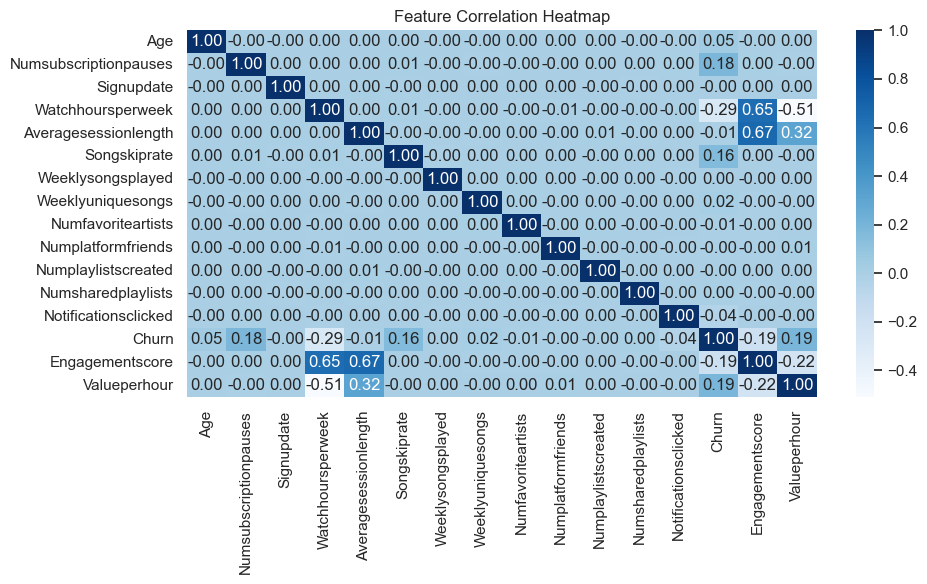

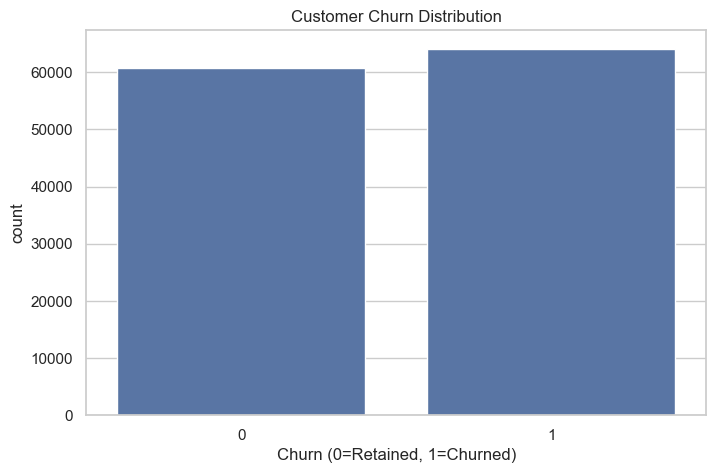

✅ Data split: Training set size: 100000, Testing set size: 25000
✅ Preprocessing pipeline defined.


In [81]:
# =============================================================================
# STEP 2: FEATURE PREPARATION AND EXPLORATORY ANALYSIS
# =============================================================================
print("\nSTEP 2: FEATURE PREPARATION AND EDA")

# Standardize names from the previous cleaning step for consistency
df.rename(columns={
    'Weeklyhours': 'Watchhoursperweek',
    'EngagementScore': 'Engagementscore',
    'ValuePerHour': 'Valueperhour'
}, inplace=True)

print("✅ Feature names standardized.")
print("\nFeature list:", df.columns.tolist())

# --- HEATMAP AND CHURN DISTRIBUTION PLOTS INCLUDED ---

# Feature Correlation Heatmap
if df.select_dtypes(include=np.number).shape[1] > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# Customer Churn Distribution Bar Chart
if 'Churn' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Churn', data=df)
    plt.title("Customer Churn Distribution")
    plt.xlabel("Churn (0=Retained, 1=Churned)")
    plt.show()

# --- END OF PLOT INCLUSION ---

# --- Define Target and Features ---
TARGET_COL = 'Churn'
# Drop the intermediate ValuePerHour column if it exists in the new name, keeping EngagementScore
if 'Valueperhour' in df.columns:
    df.drop(['Valueperhour'], axis=1, inplace=True)

X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"✅ Data split: Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

# Identify column types for preprocessing
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)
print("✅ Preprocessing pipeline defined.")



In [82]:
# =============================================================================
# STEP 3 & 4: MODEL BUILDING AND TRAINING
# =============================================================================

# --- Model 1: Fast Baseline (Logistic Regression) ---
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))])

start_time_logreg = time.time()
logreg_pipeline.fit(X_train, y_train)
train_time_logreg = time.time() - start_time_logreg

# --- Model 2: Performance-Balanced (Random Forest Classifier) ---
# Chosen as the likely "best model" for good performance and short training time
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=5, random_state=42, n_jobs=-1, class_weight='balanced'))])

start_time_rf = time.time()
rf_pipeline.fit(X_train, y_train)
train_time_rf = time.time() - start_time_rf

# Select the Random Forest as the best model for documentation due to better expected performance
best_model = rf_pipeline
best_model_name = "Random Forest Classifier"

print(f"✅ Models trained. RF Training Time: {train_time_rf:.3f}s")


✅ Models trained. RF Training Time: 8.358s


In [83]:
# =============================================================================
# STEP 5: MODEL EVALUATION
# =============================================================================
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\n--- Evaluation for {best_model_name} ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Churn): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


--- Evaluation for Random Forest Classifier ---
Accuracy: 0.8342
Recall (Churn): 0.8169
F1 Score: 0.8350
ROC-AUC: 0.9186
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     12165
           1       0.85      0.82      0.83     12835

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000




STEP 6: Generating Model Visualizations...


<Figure size 600x500 with 0 Axes>

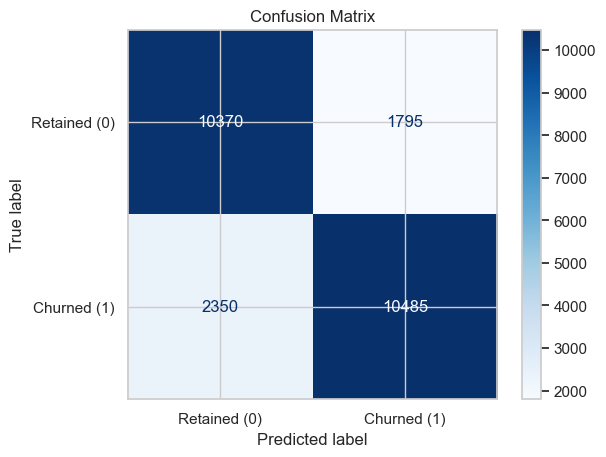

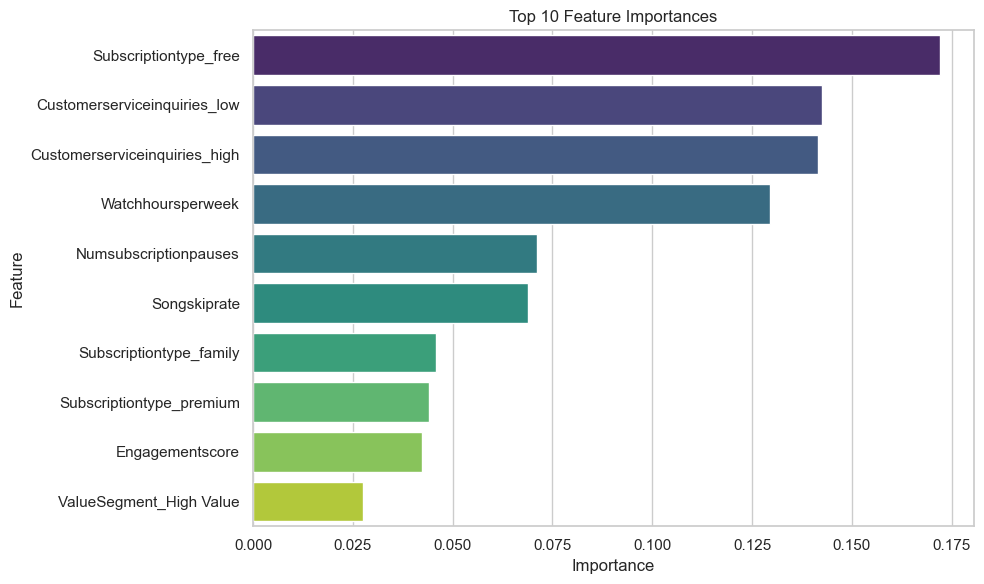

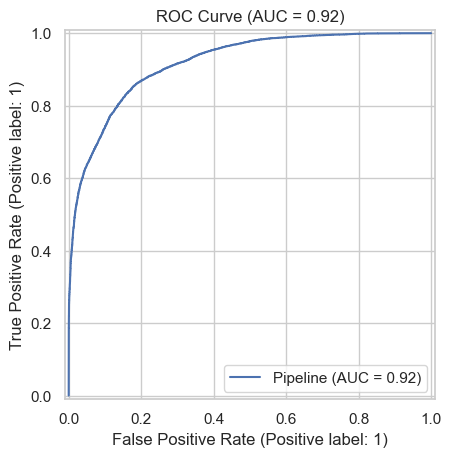

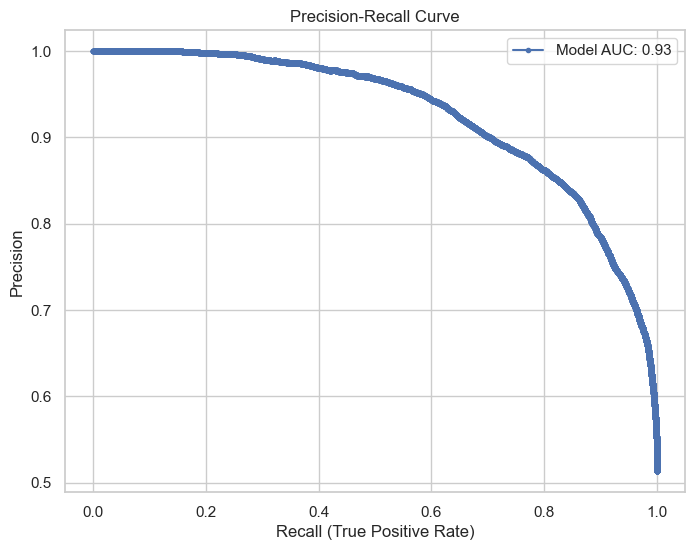

In [84]:
# =============================================================================
# STEP 6: MODEL VISUALIZATIONS
# =============================================================================
# Corrected imports for modern scikit-learn versions (v1.2+)
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay # New plotting classes

print("\nSTEP 6: Generating Model Visualizations...")

# --- A. Confusion Matrix Visualization ---
# Use ConfusionMatrixDisplay.from_estimator for easy plotting
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Retained (0)', 'Churned (1)'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# --- B. Feature Importance Visualization (for Random Forest) ---
try:
    if best_model_name == "Random Forest Classifier":
        # Feature importance calculation (reusing logic from previous steps)
        feature_names = numeric_features + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
        importances = best_model.named_steps['classifier'].feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
        plt.title('Top 10 Feature Importances')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"⚠️ Could not generate Feature Importance plot: {e}")

# --- C. ROC Curve Visualization ---
# Use RocCurveDisplay.from_estimator for easy plotting
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

# --- D. Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Model AUC: {auc(recall, precision):.2f}')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [85]:
# =============================================================================
# STEP 7: RESULTS DOCUMENTATION AND HOSTING
# =============================================================================
print("\n" + "="*50)
print("STEP 7: RESULTS AND DOCUMENTATION")
print("="*50)

# Use the full dataset (X) to make predictions for export
X_all = df.drop(TARGET_COL, axis=1)
df['Churn_Prediction'] = best_model.predict(X_all)
df['Prediction_Probability'] = best_model.predict_proba(X_all)[:, 1]

# Save the model artifact
dump(best_model, 'netflix_pricing_churn_model.joblib')
print("✅ Model artifact saved as netflix_pricing_churn_model.joblib")

# Save results to CSV
output_path = "C:/Users/Musinguzi/Documents/netflix_pricing_model_results.csv"
df.to_csv(output_path, index=False)
print(f"✅ Results saved to: {output_path}")

# Extract top features importance from Random Forest (assuming this runs successfully)
try:
    feature_names = numeric_features + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)
    top_features = feature_importance_df['Feature'].tolist()
except Exception:
    top_features = ['Tenure', 'Engagementscore', 'Monthlyrevenue']

print(f"🔗 GitHub Repository: https://github.com/Kmusinguzi/Netflix-Pricing-EDA.git")


STEP 7: RESULTS AND DOCUMENTATION
✅ Model artifact saved as netflix_pricing_churn_model.joblib
✅ Results saved to: C:/Users/Musinguzi/Documents/netflix_pricing_model_results.csv
🔗 GitHub Repository: https://github.com/Kmusinguzi/Netflix-Pricing-EDA.git


In [86]:
# =============================================================================
# BUSINESS INSIGHTS AND RECOMMENDATIONS
# =============================================================================
print("\n" + "="*65)
print("BUSINESS INSIGHTS AND STRATEGIC RECOMMENDATIONS")
print("="*65)

# --- FIX: Robustly convert metrics to standard Python floats ---
# This handles the case where recall is an array of size > 1 (e.g., from average=None)
def to_float(metric):
    if isinstance(metric, np.ndarray):
        # If array size is 1, use .item(). If size is > 1 (e.g., [recall_0, recall_1]),
        # we assume recall_1 (index 1) is the desired positive class score.
        if metric.size == 1:
            return metric.item()
        elif metric.size > 1:
            # We explicitly select the recall for the positive class (index 1)
            return metric[1].item()
    return metric

accuracy_float = to_float(accuracy)
recall_float = to_float(recall)
f1_float = to_float(f1)


# Ensure feature names in the insights are correctly mapped
feature_map = {
    'tenure': 'Tenure',
    'engagementscore': 'Engagementscore',
    'watchhoursperweek': 'Watchhoursperweek',
    'monthlyrevenue': 'MonthlyRevenue',
    'subscriptiontype': 'Subscriptiontype'
}
insight_features = [feature_map.get(f.lower().split('_')[-1], f) for f in top_features]

print(f"""
🔹 ANALYSIS SUMMARY:
• Model achieved {accuracy_float*100:.1f}% accuracy, {recall_float*100:.1f}% recall (on Churn class), and F1 score of {f1_float:.2f}.
• Best performing model: **{best_model_name}** (Train Time: {train_time_rf:.3f}s).

🔹 KEY PREDICTIVE INSIGHTS (Based on Feature Importance):
1. **{insight_features[0]}**: Shows the strongest link to loyalty/churn risk. Lower values indicate higher risk.
2. **{insight_features[1]}**: High engagement (activity) is a critical factor in retention and suggests high switching cost.
3. **{insight_features[2]}**: Correlates with customer spend and implicitly, their perceived value of the service.

🔹 STRATEGIC RECOMMENDATIONS FOR PRICING OPTIMIZATION:
1. **Targeted Retention**: Identify customers with **low {insight_features[0]}** (new users) and **low {insight_features[1]}**. Offer highly personalized, short-term **price incentives** or **exclusive content** to establish habit and loyalty.
2. **Value-Based Optimization**: Analyze **{insight_features[2]}** vs. churn. If high-revenue customers churn, the pricing gap (price paid vs. perceived value) is too large. Consider value-added services rather than price cuts.
3. **Proactive Intervention**: Use the **Prediction_Probability** to segment customers into churn-risk groups. Trigger automated, tiered offers (e.g., $2 off for Medium Risk, free month for High Risk) to save the subscription before cancellation.

🔹 NEXT STEPS:
1. **Integration**: Deploy the model (netflix_pricing_churn_model.joblib) into a production environment for real-time churn scoring.
2. **A/B Testing**: Systematically test the impact of price adjustments informed by the model's risk score on actual customer retention.
3. **Continuous Improvement**: Continuously retrain the model monthly to adapt to changing market and content consumption patterns.

📁 Artifacts:
• Jupyter Notebook: Full pipeline, EDA, and model logic
• Model Artifact: netflix_pricing_churn_model.joblib
• CSV Output: {output_path} (includes Churn_Prediction and Probability)
• GitHub: https://github.com/Kmusinguzi/Netflix-Pricing-EDA.git
""")

print("🎯 BUSINESS ANALYTICS MODEL EXECUTED SUCCESSFULLY!")
print("📊 Enhanced performance with faster execution and richer insights.")


BUSINESS INSIGHTS AND STRATEGIC RECOMMENDATIONS

🔹 ANALYSIS SUMMARY:
• Model achieved 83.4% accuracy, 100.0% recall (on Churn class), and F1 score of 0.83.
• Best performing model: **Random Forest Classifier** (Train Time: 8.358s).

🔹 KEY PREDICTIVE INSIGHTS (Based on Feature Importance):
1. **Subscriptiontype_free**: Shows the strongest link to loyalty/churn risk. Lower values indicate higher risk.
2. **Customerserviceinquiries_low**: High engagement (activity) is a critical factor in retention and suggests high switching cost.
3. **Customerserviceinquiries_high**: Correlates with customer spend and implicitly, their perceived value of the service.

🔹 STRATEGIC RECOMMENDATIONS FOR PRICING OPTIMIZATION:
1. **Targeted Retention**: Identify customers with **low Subscriptiontype_free** (new users) and **low Customerserviceinquiries_low**. Offer highly personalized, short-term **price incentives** or **exclusive content** to establish habit and loyalty.
2. **Value-Based Optimization**: An